## Name: Abhishek Chaudhary
## The Sparks Foundation: Graduate Rotational Internship Program(GRIP FEB'21)
## Data Science and Business Analytics Intern
## TASK 1: Prediction using Supervised ML

In [10]:
# Packages required for this task.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading the Dataset

In [11]:
score_data = pd.read_csv('scores.csv')  #dataset can be found here : http://bit.ly/w-data

In [12]:
score_data.shape #we get info about the number of rows and columns present in our dataset.

(25, 2)

In [13]:
score_data.head(10) #this command displays a sample of the dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Below we plot our original dataset and see if we can make out any observations

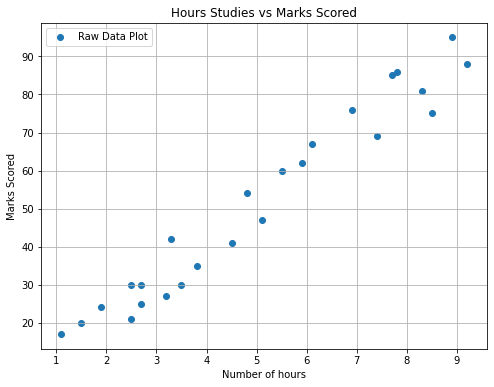

In [14]:
plt.figure(figsize=(8,6))
plt.title('Hours Studies vs Marks Scored')
plt.xlabel('Number of hours')
plt.ylabel('Marks Scored')
plt.scatter(x = 'Hours', y = 'Scores', label = 'Raw Data Plot', data = score_data)
plt.legend()
plt.grid(True);

### From the above graph we can notice that as the number of hours increases the marks scored also increases. Hence it's a positive correlation between the two features of our dataset.

## Below we split our data for training and testing purposes using the sklearn

In [15]:
x = score_data.iloc[:, :-1].values    #this command here will assign the column 'Hours' from our dataset to x 
y = score_data.iloc[:, 1].values      #this command here will assign the column 'Scores' from our dataset to y

In [16]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [17]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [18]:
#We split our dataset into 80% for training and 20% for testing.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)

(5, 1)
(5,)


In [20]:
from sklearn.linear_model import LinearRegression #Here we import linear regression from sklearn.linear_model
Linear_reg = LinearRegression() 

#The below line's used for training our algorithm using the training dataset.
Linear_reg.fit(x_train, y_train);

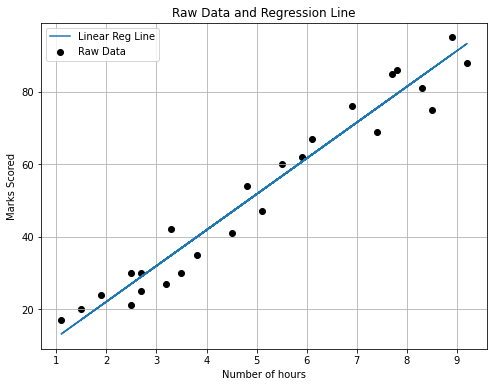

In [22]:
#The below line is our regression line.
Reg_Line = Linear_reg.coef_*x +Linear_reg.intercept_

plt.figure(figsize=(8,6))

plt.scatter(x, y, label = 'Raw Data', color = 'black')
plt.plot(x, Reg_Line, label = 'Linear Reg Line')

plt.title("Raw Data and Regression Line")
plt.xlabel('Number of hours')
plt.ylabel('Marks Scored')
plt.grid(True)
plt.legend();

## Below we'll use our trained model on our testing dataset to predict the scores

In [24]:
#Below we use our model on x_test values and predict the scores and compare them with the actual test scores.

predicted_values = Linear_reg.predict(x_test)
df = pd.DataFrame({'Actual_Scores': y_test, 'Predicted_Scores': predicted_values})  
df

,Actual_Scores,Predicted_Scores
0,47,52.715181
1,76,70.538633
2,81,84.401317
3,30,28.950578
4,69,75.489591


In [25]:
# So according to the given problem statement we use the model to predict for 9.25 hours

hours = 9.25
hours_array = np.array(hours)
hours_array = hours_array.reshape(1, -1)

own_prediction = Linear_reg.predict(hours_array)

print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_prediction}")

No of Hours = 9.25
Predicted Score = [93.80813905]


## So at the final step we evaluate the model 

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_values)) 

#Since the error isn't too high we can say our model has performed well.

Mean Absolute Error: 4.423375696979072
